# Lab 2 - Classification
#### Yang Zhang, Reannan McDaniel, Jonathon Roach, Fred Poon
##### 06/28/2020
##### Machine Learning 1 | MSDS_7331

## Business Understanding
For this analysis, our group will be working with North Carolina Public Schools Report Card and Statistical Profiles Data sets from the years 2014 to 2017. These data sets encompass information across 4 continuous years of educational attributes in North Carolina, USA.  The data is collected from the State of North Carolina at [http://ncpublicschools.org](http://ncpublicschools.org) and made available from the Belk Endowment Educational Attainment Data Repository for North Carolina Public Schools by Dr. Jake Drew. Among other reasons, the data was collected for evaluation of public-school performance for the purpose of efficiently allocating funds to various educational initiatives. Analyses of such data are important because high-impact educational initiatives that are well-funded contribute to increased graduation rates, increased achievement at the post-secondary level, less crime, and greater economic engagement among young people. For the purpose of this exercise, our focus is on predicting graduation rates using various school characteristics, such as type of school (elementary, middle, high, or some combination of the three), social demographics, economic demographics, and location between 2014 and 2017. The Belk Foundation's website says, "Our goal is to empower today’s workforce by creating pathways to and through postsecondary education for underrepresented students". -->

For the sake of this analysis, we assume that better performing schools have better outcomes in postsecondary education. With North Carolina's rapidly changing demographics, it is important to take into consideration schools' unique needs when allocating funds to strategic investment initiatives. Here, we explore where funding can be best applied based on educational achievement data.

We will explore through visual and mathematical modeling which features best predict the graduation rate. The analysis will come in a combination of classification models to predict. In this analysis we will observe:

- What classification model provides the higher accuracy score?

## Data Understanding

## Data Preparation
### Data Preparation 1 - The Variables
Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.

#### Data Preparation for Classification Task

In [3]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# For multiple line outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Data Preparation Workflow
- Data Merge
- One Hot-encoding
- Feature Selection
- Data Balancing
- *Train/Test spliting

#### Data Merge

In [9]:
# read in CSV
df2014 = pd.read_csv('https://raw.githubusercontent.com/fredpoon/ds_7331_jyrf_eda/master/Data_Prep/PublicSchools2014_MLnew.csv')
df2015 = pd.read_csv('https://raw.githubusercontent.com/fredpoon/ds_7331_jyrf_eda/master/Data_Prep/PublicSchools2015_MLnew.csv')
df2016 = pd.read_csv('https://raw.githubusercontent.com/fredpoon/ds_7331_jyrf_eda/master/Data_Prep/PublicSchools2016_MLnew.csv')
df2017 = pd.read_csv('https://raw.githubusercontent.com/fredpoon/ds_7331_jyrf_eda/master/Data_Prep/PublicSchools2017_MLnew.csv')

df2014.shape
df2015.shape
df2016.shape
df2017.shape


df2014['Year'] = 2014
df2015['Year'] = 2015 
df2016['Year'] = 2016 
df2017['Year'] = 2017 

frames = [df2014, df2015, df2016, df2017]
df_comb_test = pd.concat(frames,join='inner', ignore_index=True)

df_comb_test['Year']

(2426, 318)

(2432, 335)

(2430, 328)

(2443, 328)

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
9726    2017
9727    2017
9728    2017
9729    2017
9730    2017
Name: Year, Length: 9731, dtype: int64

#### One Hot-encoding

In [10]:
schoolData = df_comb_test

#Locate the categorical variables in dataset
sD_nominal = schoolData.loc[:, (schoolData.dtypes == object)]
uniqueThreshold = 25

#Delete categorical columns with > 25 unique values (Each unique value becomes a column during one-hot encoding)
oneHotUniqueValueCounts = schoolData[sD_nominal.columns].apply(lambda x: x.nunique())
oneHotUniqueValueCols = oneHotUniqueValueCounts[oneHotUniqueValueCounts >= uniqueThreshold].index
schoolData.drop(oneHotUniqueValueCols, axis=1, inplace=True) 

#Review dataset contents one hot high unique value drops
print('*********After: Removing columns with >= uniqueThreshold unique values***********')
schoolData.info(verbose=False)
print ('\r\nColumns Deleted: ', len(oneHotUniqueValueCols))

*********After: Removing columns with >= uniqueThreshold unique values***********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9731 entries, 0 to 9730
Columns: 250 entries, szip_ad to Year
dtypes: float64(237), int64(2), object(11)
memory usage: 18.6+ MB

Columns Deleted:  9


In [11]:
#Keep an original copy of the Data
schoolData_org = schoolData

#Pop out the SPG information from the Data
schoolData_SPG = schoolData.pop('SPG Grade')
schoolData_SPGScore = schoolData.pop('SPG Score')

# Remove All the Columns that directly used to calculate SPG Grade and Score
schoolData.drop(schoolData.iloc[:, 21:162], inplace=True, axis=1)
schoolData.info(verbose=True)

#Isolate remaining categorical variables
begColumnCt = len(schoolData.columns)

#one hot encode categorical variables
schoolData = pd.get_dummies(data=schoolData,drop_first=True)

#Determine change in column count
endColumnCt = len(schoolData.columns)
columnsAdded = endColumnCt - begColumnCt

#Review dataset contents one hot high unique value drops
print('Columns To One-Hot Encode: ', len(sD_nominal.columns))
print('\r\n*********After: Adding New Columns Via One-Hot Encoding*************************')
schoolData.info(verbose=False)
print ('\r\nNew Columns Created Via One-Hot Encoding: ', columnsAdded)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9731 entries, 0 to 9730
Data columns (total 107 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   szip_ad                              float64
 1   category_cd                          object 
 2   calendar_type_txt                    object 
 3   sna_pgm_type_cd                      object 
 4   school_type_txt                      object 
 5   calendar_only_txt                    object 
 6   title1_type_cd                       object 
 7   esea_status                          object 
 8   student_num                          float64
 9   lea_avg_student_num                  float64
 10  st_avg_student_num                   float64
 11  Grad_project_status                  object 
 12  Math I_Size                          float64
 13  lea_total_expense_num                float64
 14  lea_salary_expense_pct               float64
 15  lea_services_expense_pct             

#### Feature Selection

In [ ]:
# Random Forest apply to X with all variables
from sklearn.ensemble import RandomForestClassifier
clfa=RandomForestClassifier(n_estimators=100)
clfa.fit(schoolData,schoolData_SPG)
y_pred=clfa.predict(schoolData)

#For feature importance from RandomForestClassifier()
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(clfa, random_state=1).fit(schoolData,schoolData_SPG)
eli5.show_weights(perm, feature_names = schoolData.columns.tolist(), top=50)

In [12]:
#Pick and Choose variables
schoolData_pick = schoolData[[
'TotalTargets_pTarget_PctMet',
'MinorityMalePct',
'MinorityFemalePct',
'short_susp_per_c_num',
'avg_daily_attend_pct',
'title1_type_cd_Y',
'BlackMalePct',
'AsianFemalePct',
'BlackFemalePct',
'HispanicMalePct',
'MathGr3-8_pTarget_PctMet',
'AsianMalePct',
'SciGr5&8_pTarget_PctMet',
'nbpts_num',
'lea_sat_avg_score_num',
'stud_internet_comp_num',
'st_avg_student_num',
'HispanicFemalePct',
'Accomplished_TCHR_Standard 4_Pct',
'Accomplished_TCHR_Standard 3_Pct',
'Developing_TCHR_Standard 2_Pct',
'Accomplished_TCHR_Standard 5_Pct',
'10+ Years_LEA_Exp_Pct_Prin',
'4-10 Years_LEA_Exp_Pct_Prin',
'Accomplished_TCHR_Standard 1_Pct',
'Accomplished_TCHR_Standard 2_Pct',
'Developing_TCHR_Standard 1_Pct',
'pct_GCE_ALL',
'0-3 Years_LEA_Exp_Pct_Prin',
'st_emer_prov_teach_pct',
'lea_sat_participation_pct',
'lea_ap_participation_pct',
'lea_federal_perpupil_num',
'lea_local_perpupil_num',
'advance_dgr_pct',
'Developing_TCHR_Standard 5_Pct',
'lateral_teach_pct',
'lea_flicensed_teach_pct',
'Developing_TCHR_Standard 3_Pct',
'lea_tchyrs_0thru3_pct',
'lea_tchyrs_11plus_pct',
'lea_nbpts_num',
'lea_advance_dgr_pct',
'lea_1yr_tchr_trnovr_pct',
'lea_emer_prov_teach_pct',
'st_flicensed_teach_pct',
'st_tchyrs_0thru3_pct',
'st_1yr_tchr_trnovr_pct',
'lea_tchyrs_4thru10_pct',
'Category_Cd_T',
]]

# Dataset Dimension with picked variables
schoolData_pick.shape

(9731, 50)

#### Train/Test Split

In [57]:
# Using ShuffleSplit for Training/Testing Split 
from sklearn.model_selection import ShuffleSplit
# set seed
np.random.seed(17)

num_cv_iterations = 3
num_instances = len(schoolData_SPG)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2,random_state=42)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=42, test_size=0.2, train_size=None)


In [59]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics as mt

# create cross validation iterator
cv_stra = StratifiedKFold(n_splits=10,random_state=42)

print(cv_stra)

StratifiedKFold(n_splits=10, random_state=42, shuffle=False)


#### Data Balancing

,0
count,9216
unique,5
top,C
freq,3973


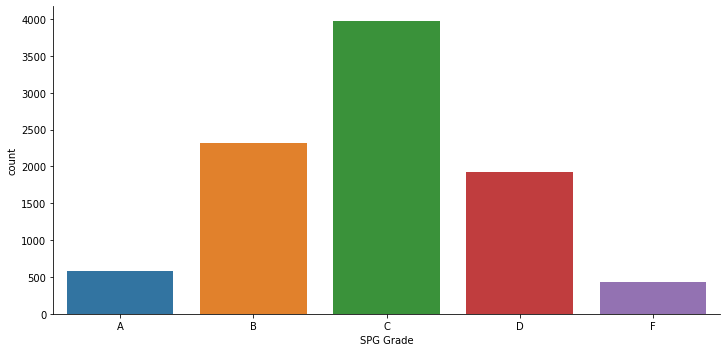

In [13]:
schoolData_SPG_org = schoolData_SPG
schoolData_SPG = schoolData_SPG_org

import numpy as np
schoolData_SPG= np.select(
    [
        schoolData_SPG == 'A', 
        schoolData_SPG == 'B',
        schoolData_SPG == 'C',
        schoolData_SPG == 'D',
        schoolData_SPG == 'F',
        schoolData_SPG == 'A+NG',
        schoolData_SPG == 'I'
    ], 
    [
        'A', 
        'B',
        'C',
        'D',
        'F',
        'A',
        'NA'
    ],
    default='NA'
)

#Filter out the sample with "NA" on SPG Grade
schoolData_SPG_new = schoolData_SPG[schoolData_SPG!='NA']
schoolData_pick_new = schoolData_pick[schoolData_SPG!='NA']

# Check if the levels of SPG Grade has been altered
s = pd.DataFrame(schoolData_SPG_new)
s.describe()

#Factor Plot for SPG Grade
s.columns=['SPG Grade']
                        
sns.factorplot("SPG Grade", data=s, aspect=2,
                       kind="count", order=['A','B','C','D','F'])

plt.show()

In [14]:
from imblearn.under_sampling import RandomUnderSampler

# Undersample the dataset using the RandomUnderSampler 
# Set all class sizes equal to the smallest class.
us = RandomUnderSampler()
X_us, y_us = us.fit_sample(schoolData_pick_new, pd.DataFrame(schoolData_SPG_new))

# Undersample the dataset using the RandomUnderSampler 
# Undersample the majority class only
us = RandomUnderSampler(sampling_strategy='majority')
X_us_maj, y_us_maj = us.fit_sample(schoolData_pick_new, pd.DataFrame(schoolData_SPG_new))

from imblearn.over_sampling import SMOTE

# Oversample using SMOTE
# Make all classes the same size as the majority class.
# WARNING - This can exponentially increase the size of the input dataset.
sm = SMOTE(sampling_strategy='not majority')
X_sm, y_sm = sm.fit_sample(schoolData_pick_new, pd.DataFrame(schoolData_SPG_new))

In [20]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
#Training using Undersample Method1 
for train_indices, test_indices in cv_object.split(X_us,y_us): 

    X_train = X_us.values[train_indices]
    y_train = y_us.values[train_indices]
    
    X_test = X_us.values[test_indices]
    y_test = y_us.values[test_indices]
    

clfus=RandomForestClassifier(n_estimators=100)
clfus.fit(X_train,y_train)
y_pred_us=clfus.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_us))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy: 0.6790697674418604


In [21]:
#Training using Undersample Method2
for train_indices, test_indices in cv_object.split(X_us_maj,y_us_maj): 

    X_train = X_us_maj.values[train_indices]
    y_train = y_us_maj.values[train_indices]
    
    X_test = X_us_maj.values[test_indices]
    y_test = y_us_maj.values[test_indices]
    
clfusm=RandomForestClassifier(n_estimators=100)
clfusm.fit(X_train,y_train)
y_pred_usm=clfusm.predict(X_test)
    
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_usm))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy: 0.7770925110132159


In [22]:
#Training using Oversample Method
for train_indices, test_indices in cv_object.split(X_sm,y_sm): 

    X_train = X_sm.values[train_indices]
    y_train = y_sm.values[train_indices]
    
    X_test = X_sm.values[test_indices]
    y_test = y_sm.values[test_indices]

clfsm=RandomForestClassifier(n_estimators=100)
clfsm.fit(X_train,y_train)
y_pred_sm=clfsm.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_sm))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy: 0.8756607097910899


In [41]:
from sklearn.preprocessing import StandardScaler
# Scale the data 
ss = StandardScaler()
X_sm_scal = ss.fit_transform(X_sm)

Cumulative Explained variance at 200 components: 1.0000000000000002


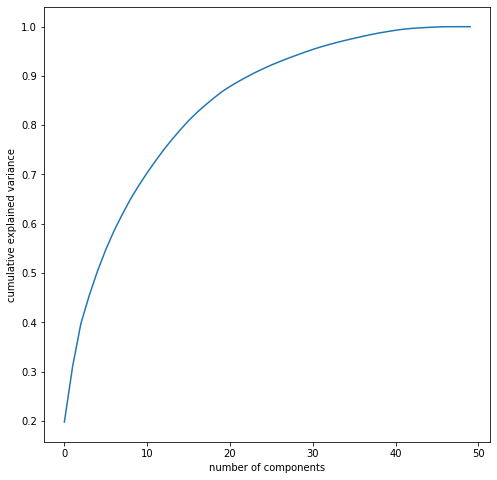

In [43]:
def plot_pca(X):
    # Perform PCA on the data to reduce the number of initial features 
    # and to remove correlations that are common between pixel features 
    pca = PCA(n_components=X.shape[1])
    pca.fit(X)

    # Inspect the explained variances to determine how many components to use  
    plt.subplots(figsize=(8, 8))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    print('Cumulative Explained variance at 200 components:',sum(pca.explained_variance_ratio_[0:199]) )

plot_pca(X_sm_scal)

In [63]:
# Convert X_sm to 200 principal components
pca = PCA(n_components=40)
X_sm_pca40 = pca.fit_transform(X_sm_scal)

#Training using Oversample Method
for train_indices, test_indices in cv_object.split(X_sm_pca40,y_sm): 

    X_train = X_sm.values[train_indices]
    y_train = y_sm.values[train_indices]
    
    X_test = X_sm.values[test_indices]
    y_test = y_sm.values[test_indices]

clfsm=RandomForestClassifier(n_estimators=100)
clfsm.fit(X_train,y_train)
y_pred_sm=clfsm.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_sm))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy: 0.8751573118550214


#### Data Preparation for Regression Task

For Education Dataset, we choose the Graduration Rate as our response variable for a regression task. Because only high school have valid graduration rate variables, we choose to start with 2014-2017 high school datasets below. One hot-encoding procedure has been conducted similiarly with the dataset above. 

Data Preparation Workflow
- Data Merge
- Feature Selection

In [24]:
# read in CSV
df2014 = pd.read_csv('C:/Users/taniat470s/Desktop/SMU_course/DS7331/EduData/EducationDataNC/2014/Machine Learning Datasets/PublicHighSchools2014_ML.csv')
df2015 = pd.read_csv('C:/Users/taniat470s/Desktop/SMU_course/DS7331/EduData/EducationDataNC/2015/Machine Learning Datasets/PublicHighSchools2015_ML.csv')
df2016 = pd.read_csv('C:/Users/taniat470s/Desktop/SMU_course/DS7331/EduData/EducationDataNC/2016/Machine Learning Datasets/PublicHighSchools2016_ML.csv')
df2017 = pd.read_csv('C:/Users/taniat470s/Desktop/SMU_course/DS7331/EduData/EducationDataNC/2017/Machine Learning Datasets/PublicHighSchools2017_ML.csv')

df2014.shape
df2015.shape
df2016.shape
df2017.shape

df2014['Year'] = 2014
df2015['Year'] = 2015 
df2016['Year'] = 2016 
df2017['Year'] = 2017 

frames = [df2014, df2015, df2016, df2017]
df_comb_test = pd.concat(frames,join='inner', ignore_index=True)

df_comb_test['Year']

(476, 351)

(480, 412)

(478, 373)

(470, 403)

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
1899    2017
1900    2017
1901    2017
1902    2017
1903    2017
Name: Year, Length: 1904, dtype: int64

In [25]:
schoolData = df_comb_test

#Remove schools with graduation rates == 0 from the model
schoolData = schoolData[schoolData['GraduationRate_5yr_All'] > 0]

#Find Response Variable
schoolData_GraduationRate_5yr = schoolData.GraduationRate_5yr_All

# Remove any columns from the model's training data that are directly related to the graduation rate. 
GradRateCols = schoolData.columns[schoolData.columns.str.lower().str.contains('graduation')]
GradRateCols

Index(['GraduationRate_5yr_All', 'GraduationRate_4yr_Female',
       'GraduationRate_5yr_Female', 'GraduationRate_4yr_Male',
       'GraduationRate_5yr_Male', 'GraduationRate_4yr_AmericanIndian',
       'GraduationRate_5yr_AmericanIndian', 'GraduationRate_4yr_Asian',
       'GraduationRate_5yr_Asian', 'GraduationRate_4yr_Black',
       'GraduationRate_5yr_Black', 'GraduationRate_4yr_Hispanic',
       'GraduationRate_5yr_Hispanic', 'GraduationRate_4yr_TwoorMoreRaces',
       'GraduationRate_5yr_TwoorMoreRaces', 'GraduationRate_4yr_White',
       'GraduationRate_5yr_White', 'GraduationRate_4yr_EDS',
       'GraduationRate_5yr_EDS', 'GraduationRate_4yr_LEP',
       'GraduationRate_5yr_LEP', 'GraduationRate_4yr_SWD',
       'GraduationRate_5yr_SWD', 'GraduationRate_4yr_AIG',
       'GraduationRate_5yr_AIG'],
      dtype='object')

In [45]:
#Delete the response variable and other graduation rate data columns from our training dataset
X_predGradRate = schoolData.drop(GradRateCols, axis=1)

Y_GradRate = schoolData_GraduationRate_5yr

In [55]:
from sklearn.linear_model import ElasticNet

regEstimator = ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=10000, normalize=True, positive=False, precompute=True,
           random_state=0, selection='random', tol=0.0001, warm_start=True)

cv_shuf = ShuffleSplit(n_splits=10, test_size=0.10, random_state=42)

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics.
EvaluateRegressionEstimator(regEstimator, X_predGradRate, Y_GradRate, cv_shuf)

The average MAE for all cv folds is: 			 3.7469
The average MAE percentage (MAPE) for all cv folds is: 	 4.2349
The average RMSE for all cv folds is: 			 4.8868
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,4.000730,4.577567,5.373892
1,4.054610,4.493058,5.112391
2,3.554386,4.005055,4.854953
3,3.675547,4.189348,5.019531
4,3.380067,3.855515,4.487842
5,3.712535,4.209166,4.779840
6,3.732916,4.207476,5.045214
7,3.747741,4.267060,4.794589
8,3.823305,4.293651,4.712894
9,3.787541,4.250614,4.686826


In [46]:
X_predGradRate.shape[1]

263

Cumulative Explained variance at 200 components: 0.9896395173771044


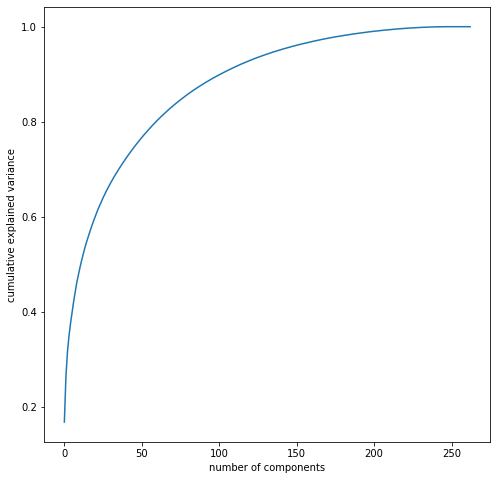

In [47]:
X_predGradRate_scal = ss.fit_transform(X_predGradRate)

plot_pca(X_predGradRate_scal)

In [49]:
# Convert X_sm to 200 principal components
pca = PCA(n_components=200)
X_predGradRate_pca200 = pca.fit_transform(X_predGradRate_scal)

In [56]:
#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics.
EvaluateRegressionEstimator(regEstimator, X_predGradRate_pca200, Y_GradRate, cv_shuf)

The average MAE for all cv folds is: 			 3.8874
The average MAE percentage (MAPE) for all cv folds is: 	 4.3916
The average RMSE for all cv folds is: 			 5.0879
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,4.096475,4.691322,5.511115
1,4.278014,4.729761,5.430965
2,3.762334,4.229568,5.131549
3,3.823241,4.354770,5.180339
4,3.391845,3.869740,4.616668
5,3.789780,4.294546,4.961250
6,3.902012,4.395352,5.177966
7,3.831644,4.377025,4.933422
8,4.084981,4.568718,5.041283
9,3.913243,4.404916,4.893997


### Data Preparation 2 - The Dataset
Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).Choose and explain your evaluation metrics that you will use (i.e., accuracy,

#### Data Description for Classification Task

The data set contains 9,731 records and 259 attributes that are comprised of factors, numbers, and characters. A data definition sheet can be found in Dr. Drew's github repository, [https://github.com/jakemdrew/EducationDataNC](https://github.com/jakemdrew/EducationDataNC/tree/master/Data%20Documentation). To scale the data to be more manageable, our data set includes 50 of the 259 attributes. 

These variables were chosen after initial EDA and correlation visuals were generated between SPG and all predictors. The data type, category and description are displayed in the following table.

### Attributes
| Attribute | DataType | Description |
|:---|:---|:---|
| SPG Grade                          | object  | School Performance Grade (Letter Grade - A-D, F) |
| MinorityMalePct                    | float64 | Minority Male Perentage |
| MinorityFemalePct                  | float64 | Minority Female Percentage |
| short_susp_per_c_num               | float64 | Short term suspensions per 100 students at school level |
| avg_daily_attend_pct               | float64 | Average daily attendance percentage at school level |
| title1_type_cd_Y                   | uint8   | Title 1 Status |
| BlackMalePct                       | float64 | Black Male Percentage |
| AsianFemalePct                     | float64 | Asian Female Percentage |
| BlackFemalePct                     | float64 | Black Female Percentage |
| TotalTargets_pTarget_PctMet        | float64 | Percentage of total targets met |
| HispanicMalePct                    | float64 | Hispanic Male Percentage |
| MathGr3-8_pTarget_PctMet           | float64 | Percentage of students meeting Math target in grade levels 3 thru 8 |
| AsianMalePct                       | float64 | Asian Male Percentage |
| SciGr5&8_pTarget_PctMet            | float64 | Percentage of students meeting Science target in grade level 5 & 8 |
| nbpts_num                          | float64 | Number of National Board Certified Staff at school level |
| lea_sat_avg_score_num              | float64 | Average SAT score at LEA level |
| stud_internet_comp_num             | float64 | Ratio of students to internet connected computer at school level |
| st_avg_student_num                 | float64 | Average school size within the State |
| HispanicFemalePct                  | float64 | Hispanic Female Percentage |
| Accomplished_TCHR_Standard 4_Pct   | float64 | Percentage of accomplished teachers with teacher evaluation value of 4 |
| Accomplished_TCHR_Standard 3_Pct   | float64 | Percentage of accomplished teachers with teacher evaluation value of 3 |
| Developing_TCHR_Standard 2_Pct     | float64 | Percentage of developing teachers with teacher evaluation value of 2 |
| Accomplished_TCHR_Standard 5_Pct   | float64 | Percentage of accomplished teachers with teacher evaluation value of 5 |
| 10+ Years_LEA_Exp_Pct_Prin         | float64 | Percentage of principle with more than 10 years of experience at the LEA level |
| 4-10 Years_LEA_Exp_Pct_Prin        | float64 | Percentage of principle with 4-10 years of experience at the LEA level |
| Accomplished_TCHR_Standard 1_Pct   | float64 | Percentage of accomplished teachers with teacher evaluation value of 1 |
| Accomplished_TCHR_Standard 2_Pct   | float64 | Percentage of accomplished teachers with teacher evaluation value of 2 |
| Developing_TCHR_Standard 1_Pct     | float64 | Percentage of developing teachers with teacher evaluation value of 1 |
| pct_GCE_ALL                        | float64 | Percentage of Third Grade Students Passed with Good Cause Exemption |
| 0-3 Years_LEA_Exp_Pct_Prin         | float64 | Percentage of principle with 0-3 years of experience at the LEA level |
| st_emer_prov_teach_pct             | float64 | Emerging teachers at State level |
| lea_sat_participation_pct          | float64 | Percentage of HS students taking an SAT exam at the LEA level |
| lea_ap_participation_pct           | float64 | Advanced Placement participation at LEA level |
| lea_federal_perpupil_num           | float64 | Federal expense per pupil at LEA level |
| lea_local_perpupil_num             | float64 | Local expense per pupil at LEA level |
| advance_dgr_pct                    | float64 | Percent of teachers with masters or higher degree at school dgr |
| Developing_TCHR_Standard 5_Pct     | float64 | Percentage of teacher with level 5 in Developing |
| lateral_teach_pct                  | float64 | Lateral entry teacher percentage at school level |
| lea_flicensed_teach_pct            | float64 | Average Percent of Teachers that meet NC fully licensed |
| Developing_TCHR_Standard 3_Pct     | float64 | Percentage of teacher with level 3 in Developing |
| lea_tchyrs_0thru3_pct              | float64 | LEA level Teacher experiences 0 to 3 years  |
| lea_tchyrs_11plus_pct              | float64 | LEA level Teacher experiences over 11 years |
| lea_nbpts_num                      | float64 | Average number of National Board Certified staff at LEA |
| lea_advance_dgr_pct                | float64 | Average percent of teachers with masters or higher degree at LEA level |
| lea_1yr_tchr_trnovr_pct            | float64 | One Year Teacher turnover percentage at school level |
| lea_emer_prov_teach_pct            | float64 | Emerging teachers at LEA level |
| st_flicensed_teach_pct             | float64 | Average Percent of Teachers that meet NC fully licensed |
| st_tchyrs_0thru3_pct               | float64 | Percentage of teachers with 4-10 years of experience at the State level |
| st_1yr_tchr_trnovr_pct             | float64 | Standardize One Year Teacher turnover percentage at school level |
| lea_tchyrs_4thru10_pct             | float64 | Percentage of teachers with 4-10 years of experience at the LEA level |
| Category_Cd_T                      | uint8   | School with Category code T (School has middle and high school grades) |

For classification task:
- Accuracy
- Accuracy of each class
- Confusion Matrix
- ROC curves of each class and all classes
- Optional: Precision and Recall

In [76]:
# Compare input and predictions
y=y_test
yhat=y_pred_sm

# get various measures of performance
total_accuracy = mt.accuracy_score(y, yhat)

rec_tot = []
prec_tot = []

for cls in np.unique(y):
    idx = (y==cls) # get classes
    ytmp_actual = np.zeros(y.shape) # make binary class problem
    ytmp_actual[idx] = 1 # set the instances for this specific class
    
    ytmp_predicted = np.zeros(y.shape) # binary prediction array
    ytmp_predicted[yhat==cls] = 1
    
    #num_in_class = sum(idx)
    
    rec = mt.recall_score(ytmp_actual, ytmp_predicted)
    prec = mt.precision_score(ytmp_actual, ytmp_predicted)
    rec_tot.append(rec)
    prec_tot.append(prec)

print ('Total Accuracy:',total_accuracy)
print ('Recalls for each class:',rec_tot)
print ('Precisions for each class:',prec_tot)

Total Accuracy: 0.8751573118550214
Recalls for each class: [0.9831121833534379, 0.8329177057356608, 0.7179802955665024, 0.875, 0.9728997289972899]
Precisions for each class: [0.9588235294117647, 0.8267326732673267, 0.786774628879892, 0.8440925700365408, 0.953519256308101]


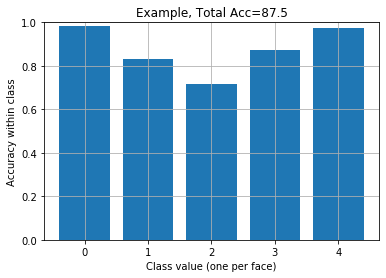

In [78]:
def per_class_accuracy(y,yhat):
    conf = mt.confusion_matrix(y,yhat)
    norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
    return np.diag(norm_conf)

def plot_class_acc(ytrue,yhat, title=''):
    acc_list = per_class_accuracy(ytrue,yhat)
    plt.bar(range(len(acc_list)), acc_list)
    plt.xlabel('Class value (one per face)')
    plt.ylabel('Accuracy within class')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhat)))
    plt.grid()
    plt.ylim([0,1])
    plt.show()
 

plot_class_acc(y,yhat,title="Example")

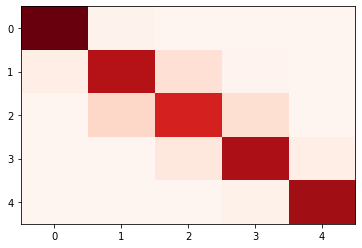

In [79]:
# how about plotting a confusion matrix?
cm = mt.confusion_matrix(y, yhat)
plt.imshow(cm,cmap=plt.get_cmap('Reds'),aspect='auto')
plt.grid(False)

In [81]:
yhat_score = clfsm.predict_proba(X_test)
yhat_score

array([[0.02, 0.29, 0.47, 0.22, 0.  ],
       [0.02, 0.91, 0.06, 0.01, 0.  ],
       [0.  , 0.01, 0.12, 0.28, 0.59],
       ...,
       [0.  , 0.02, 0.17, 0.81, 0.  ],
       [0.  , 0.  , 0.  , 0.01, 0.99],
       [0.07, 0.21, 0.52, 0.19, 0.01]])

In [94]:
y_test_num= np.select(
    [
        y_test == 'A', 
        y_test == 'B',
        y_test == 'C',
        y_test == 'D',
        y_test == 'F',
    ], 
    [
        '0', 
        '1',
        '2',
        '3',
        '4',
    ],
    default='NA'
)

y_test_num = y_test_num.astype(int)

In [97]:
y=y_test_num

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

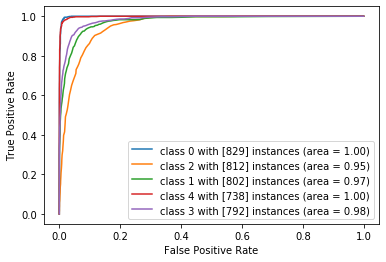

In [98]:
# Compute ROC curve for a subset of interesting classes
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in np.unique(y):
    fpr[i], tpr[i], _ = mt.roc_curve(y, yhat_score[:, i], pos_label=i)
    roc_auc[i] = mt.auc(fpr[i], tpr[i])
    
for i in np.random.permutation(5)[0:5]:
    plt.plot(fpr[i], tpr[i], label='class {0} with {1} instances (area = {2:0.2f})'
                                   ''.format(i, sum(y==i), roc_auc[i]))

plt.legend(loc="lower right")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [100]:
from sklearn.preprocessing import label_binarize
one_hot_class_encoding = label_binarize(y,np.unique(y))
one_hot_class_encoding

array([[0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0]])

In [107]:
fpr["micro"], tpr["micro"], _ = mt.roc_curve(one_hot_class_encoding.ravel(), yhat_score.ravel())
roc_auc["micro"] = mt.auc(fpr["micro"], tpr["micro"])

<Figure size 864x288 with 0 Axes>

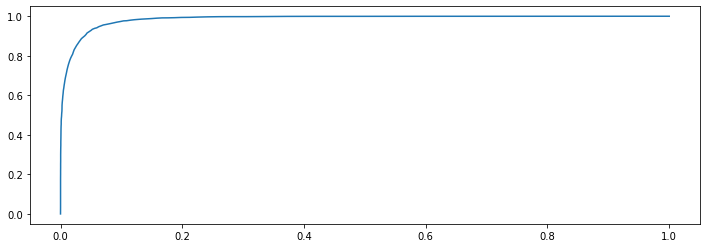

In [108]:
plt.figure(figsize=(12,4))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))

#### Data Description for Regression Task

The data set contains 1,811 records and 263 attributes that are comprised of factors, numbers, and characters. A data definition sheet can be found in Dr. Drew's github repository, [https://github.com/jakemdrew/EducationDataNC](https://github.com/jakemdrew/EducationDataNC/tree/master/Data%20Documentation). Because we need at least 40,000 records for this task, we are using all the attributes for this regression task. 

The data type, category and description are displayed in the following table.
### Attributes
| Attribute | DataType | Description |

In [8]:
X_schoolData.describe()
X_schoolData.shape

,student_num,lea_avg_student_num,st_avg_student_num,Biology_Size,English II_Size,Math I_Size,lea_total_expense_num,lea_salary_expense_pct,lea_services_expense_pct,lea_supplies_expense_pct,...,"calendar_type_txt_Regular School, Year-Round Calendar",esea_status_P,Grad_project_status_Y,SPG Grade_B,SPG Grade_C,SPG Grade_D,EVAAS Growth Status_Met,EVAAS Growth Status_NotMet,unit_code,Year
count,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,...,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000
mean,877.722253,832.858642,832.726118,18.930425,19.615130,18.453341,9084.812656,0.669730,0.081085,0.081854,...,0.014909,0.034787,0.406405,0.341248,0.402540,0.088349,0.321369,0.317504,507337.515737,2015.493650
std,585.214712,348.911687,94.675672,5.208325,5.124998,5.340805,1172.136628,0.094682,0.016434,0.015835,...,0.121222,0.183292,0.491298,0.474259,0.490545,0.283880,0.467131,0.465634,278643.806890,1.113125
min,16.000000,105.000000,252.000000,0.000000,0.000000,0.000000,7282.190000,0.547000,0.047000,0.028000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10303.000000,2014.000000
25%,366.500000,598.000000,837.000000,16.000000,17.000000,16.000000,8362.900000,0.611000,0.069000,0.072000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,280304.000000,2015.000000
50%,813.000000,812.000000,848.000000,19.000000,20.000000,19.000000,8821.640000,0.626000,0.081000,0.082000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,490362.000000,2015.000000
75%,1236.500000,974.000000,853.000000,23.000000,23.000000,22.000000,9405.800000,0.655000,0.089000,0.092000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,760369.000000,2016.000000
max,2966.000000,1852.000000,860.000000,32.000000,35.000000,37.000000,17801.850000,0.878000,0.153000,0.143000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,995330.000000,2017.000000


(1811, 263)

For regression task:
- Matrix of MAE, RMSE and MAPE

In [53]:
#Divide data into test and training splits
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.10, random_state=42)

In [52]:
#The below function reference to https://github.com/jakemdrew/DataMiningNotebooks/blob/master/07.%20Regression.ipynb
#Use mean absolute error (MAE) to score the regression models created 
#(the scale of MAE is identical to the response variable)
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error

#Function for Root mean squared error
def rmse(y_actual, y_predicted):
    return np.sqrt(mean_squared_error(y_actual, y_predicted))

#Function for Mean Absolute Percentage Error (MAPE) - Untested
#Adapted from - https://stackoverflow.com/questions/42250958/how-to-optimize-mape-code-in-python
def mape(y_actual, y_predicted): 
    mask = y_actual != 0
    return (np.fabs(y_actual - y_predicted)/y_actual)[mask].mean() * 100

#Create scorers for rmse and mape functions
mae_scorer = make_scorer(score_func=mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(score_func=rmse, greater_is_better=False)
mape_scorer = make_scorer(score_func=mape, greater_is_better=False)

#Make scorer array to pass into cross_validate() function for producing mutiple scores for each cv fold.
errorScoring = {'MAE':  mae_scorer, 
                'RMSE': rmse_scorer,
                'MAPE': mape_scorer
               }

In [54]:
from sklearn.model_selection import cross_validate

def EvaluateRegressionEstimator(regEstimator, X, y, cv):
    
    scores = cross_validate(regEstimator, X, y, scoring=errorScoring, cv=cv, return_train_score=True)

    #cross val score sign-flips the outputs of MAE
    scores['test_MAE'] = scores['test_MAE'] * -1
    scores['test_MAPE'] = scores['test_MAPE'] * -1
    scores['test_RMSE'] = scores['test_RMSE'] * -1

    #print mean MAE for all folds 
    maeAvg = scores['test_MAE'].mean()
    print_str = "The average MAE for all cv folds is: \t\t\t {maeAvg:.5}"
    print(print_str.format(maeAvg=maeAvg))

    #print mean test_MAPE for all folds
    scores['test_MAPE'] = scores['test_MAPE']
    mape_avg = scores['test_MAPE'].mean()
    print_str = "The average MAE percentage (MAPE) for all cv folds is: \t {mape_avg:.5}"
    print(print_str.format(mape_avg=mape_avg))

    #print mean MAE for all folds 
    RMSEavg = scores['test_RMSE'].mean()
    print_str = "The average RMSE for all cv folds is: \t\t\t {RMSEavg:.5}"
    print(print_str.format(RMSEavg=RMSEavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['MAE'] = scores['test_MAE']
    scoresResults['MAPE'] = scores['test_MAPE']
    scoresResults['RMSE'] = scores['test_RMSE']
    return scoresResults

### Exceptional Work
<!-- Gridsearch -->

## Modeling and Evaluation
### Model Evaluation 1

### Model Evaluation 2

### Model Evaluation 3

### Model Evaluation 4

### Model Evaluation 5

### Model Evaluation 6

### Deployment

### Appendix